      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

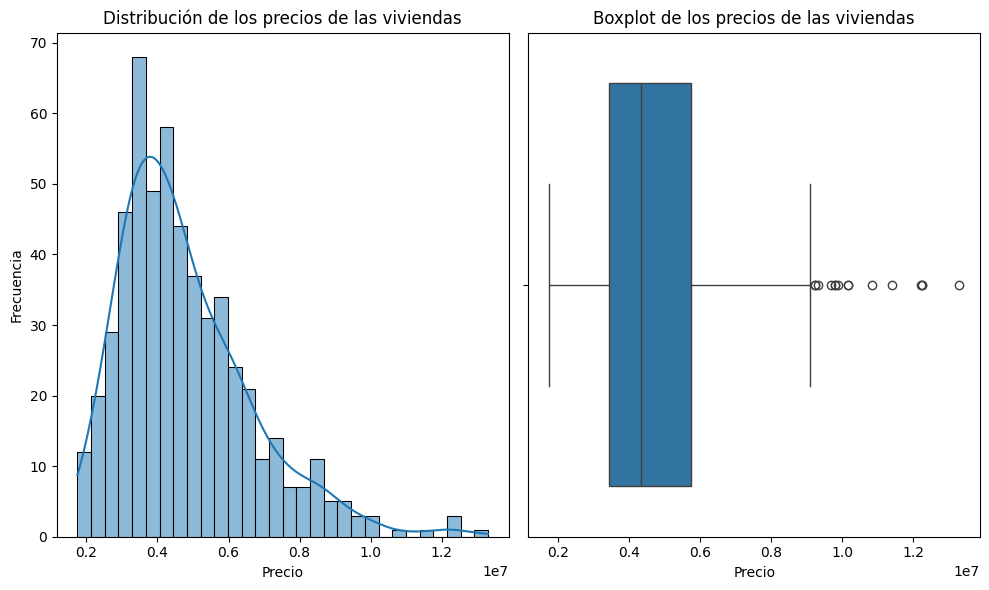

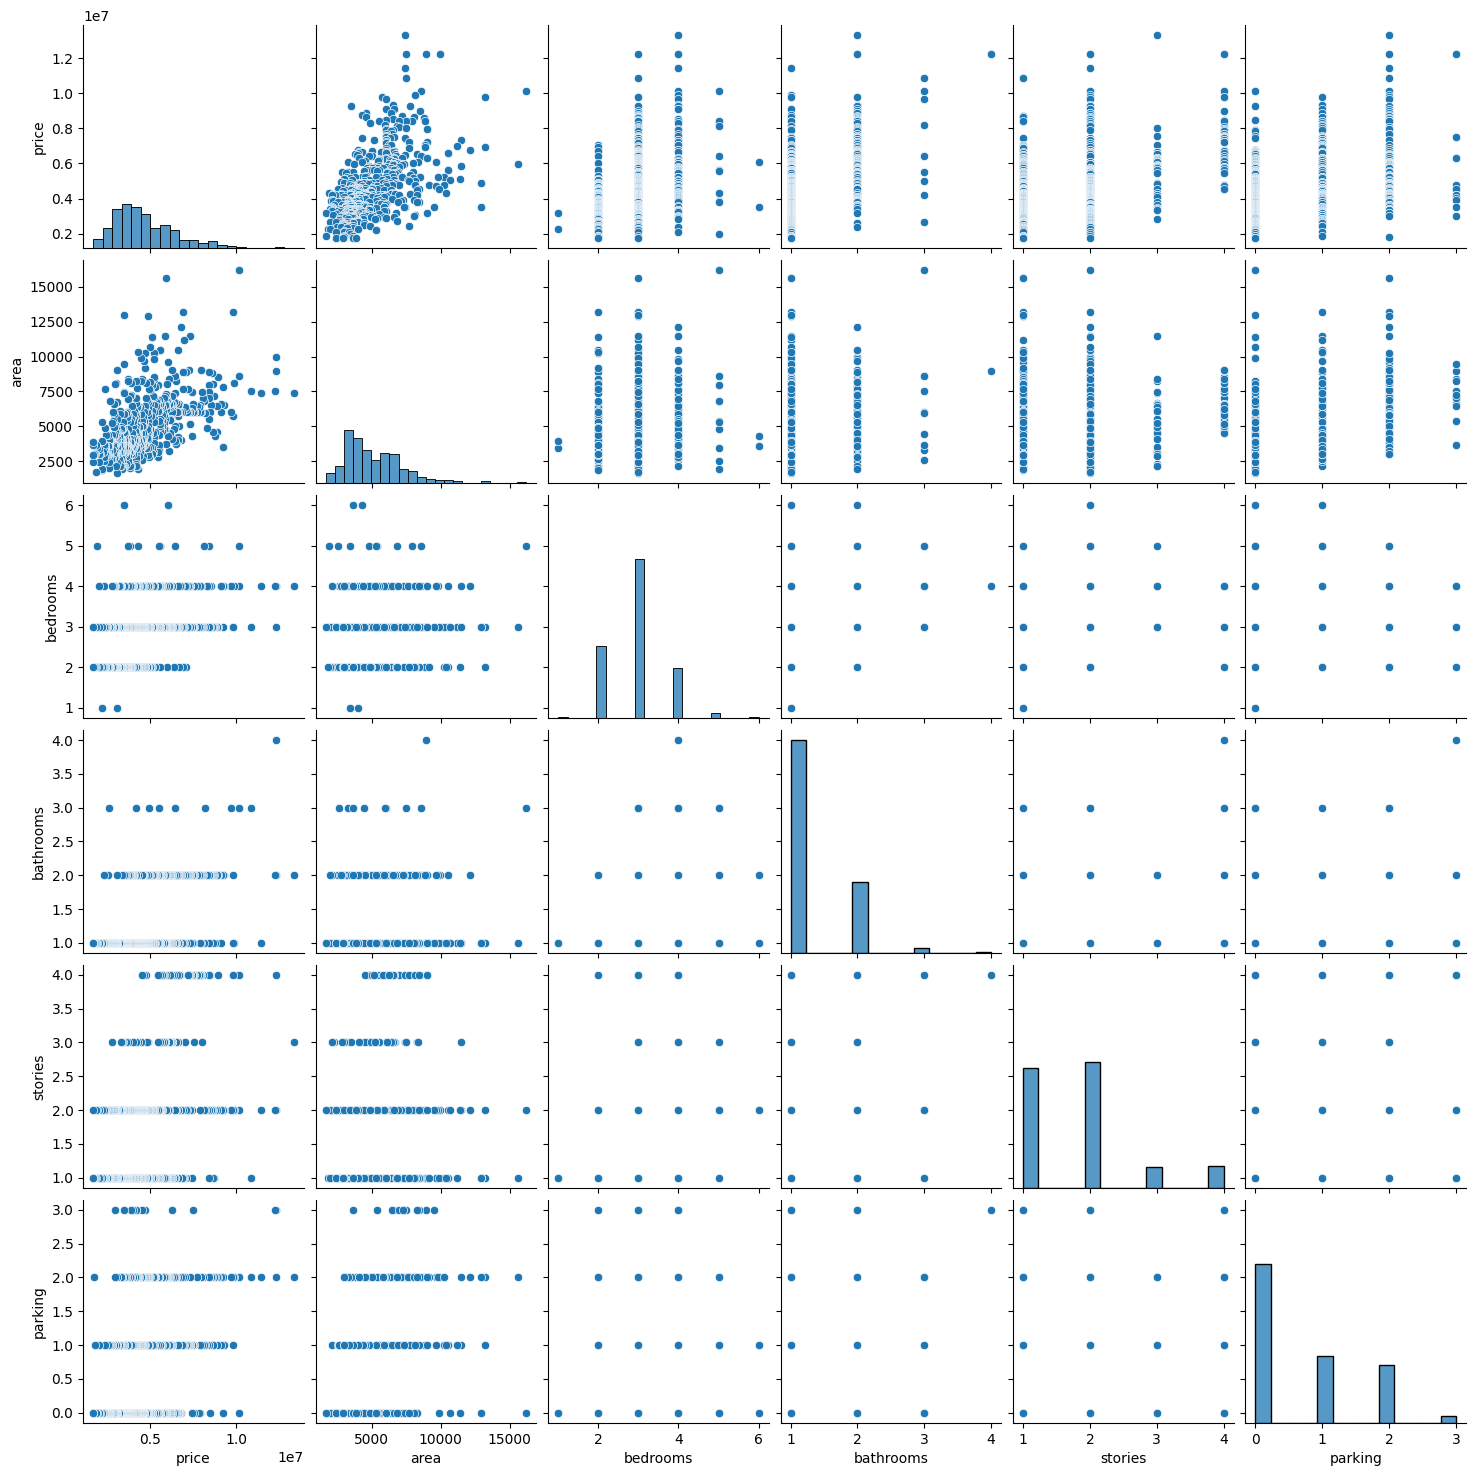

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

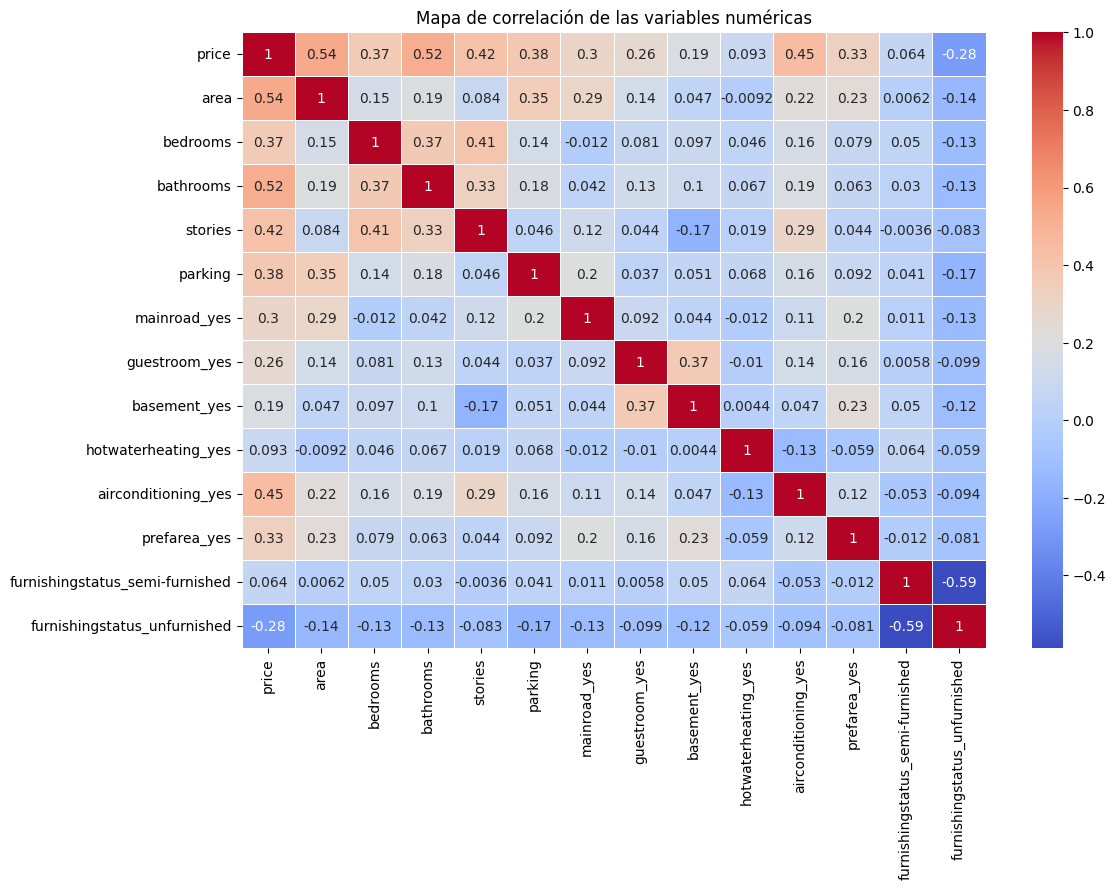

Coeficientes del modelo de regresión lineal:
area: 511615.5637766584
bedrooms: 56615.572457787
bathrooms: 549420.5012409779
stories: 353158.42985603615
parking: 193542.78167454555
mainroad_yes: 128151.9212953321
guestroom_yes: 88590.213461521
basement_yes: 186194.15050566368
hotwaterheating_yes: 143233.20624958415
airconditioning_yes: 367817.8949155817
prefarea_yes: 267018.6608123929
furnishingstatus_semi-furnished: -62550.29721128313
furnishingstatus_unfurnished: -193987.78108820412

Intercepto del modelo: 4737518.175380118
Error cuadrático medio (MSE): 1754318687330.6677
Error absoluto medio (MAE): 970043.4039201642
Coeficiente de determinación (R²): 0.6529242642153177


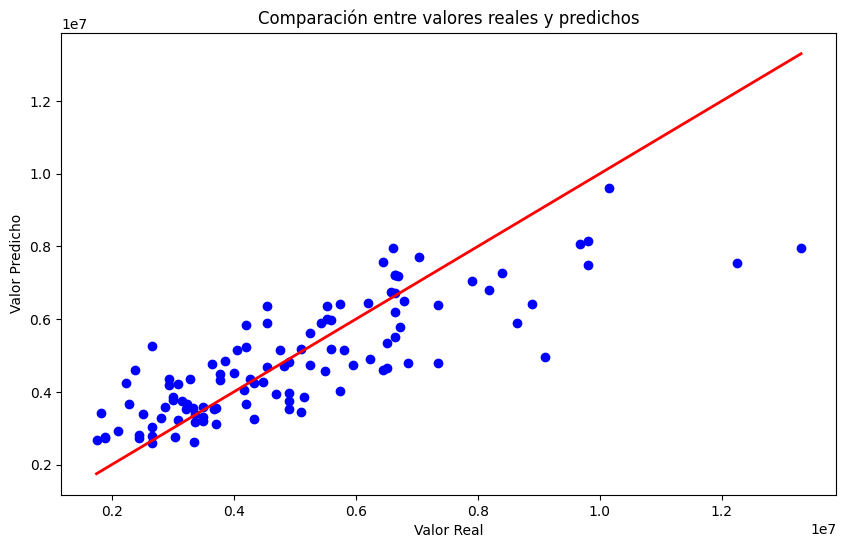

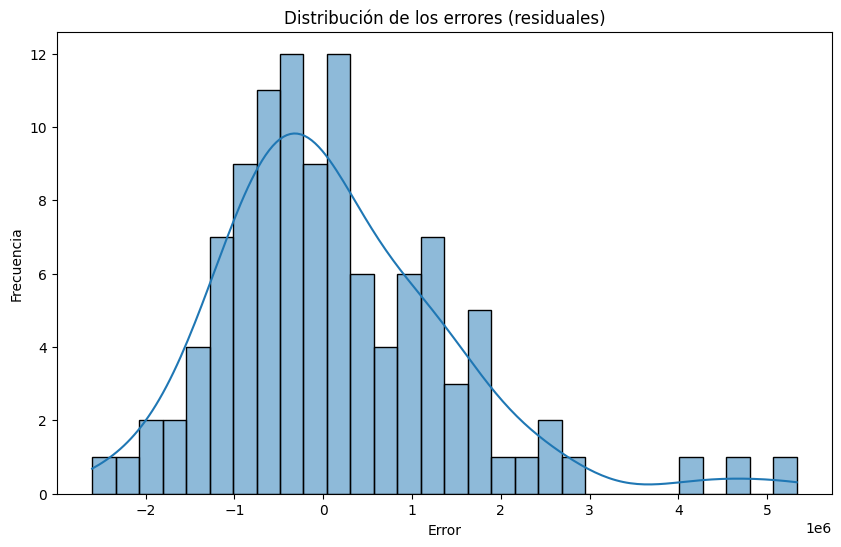

In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1.- Carga y exploración de datos
# Cargar el dataset
df = pd.read_csv('/workspace/Housing.csv')

# Revisar las primeras filas del dataset
print(df.head())

# Descripción de los datos
print(df.describe())

# Verificar los tipos de datos de las columnas
print(df.info())

# Revisar valores nulos
print(df.isnull().sum())

# Visualización de la variable 'price'
plt.figure(figsize=(10, 6))

# Histograma de la variable 'price'
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribución de los precios de las viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Boxplot de la variable 'price'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot de los precios de las viviendas')
plt.xlabel('Precio')

plt.tight_layout()
plt.show()

# Pairplot de las variables numéricas
sns.pairplot(df.select_dtypes(include=[float, int]))
plt.show()

# 2.- Preprocesamiento de datos
# Convertir variables categóricas a variables numéricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Revisar las primeras filas después de la codificación
print(df_encoded.head())

# Mapa de calor de correlación entre las variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de correlación de las variables numéricas')
plt.show()

# Tratar los datos faltantes o nulos (ejemplo: eliminar filas con nulos)
df_encoded = df_encoded.dropna()

# (Opcional) Normalización de las características numéricas si es necesario
scaler = StandardScaler()

# Normalizar solo las columnas numéricas, excepto 'price'
X_columns = df_encoded.drop('price', axis=1).columns
df_encoded[X_columns] = scaler.fit_transform(df_encoded[X_columns])

# 3.- División del dataset
# Dividir los datos en características (X) y la variable objetivo (y)
X = df_encoded.drop('price', axis=1)  # Todas las columnas menos 'price'
y = df_encoded['price']               # Columna 'price'

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.- Creación del modelo de regresión
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener los coeficientes y el intercepto
coeficientes = model.coef_
intercepto = model.intercept_

# Mostrar los valores de los coeficientes y el intercepto
print("Coeficientes del modelo de regresión lineal:")
for col, coef in zip(X.columns, coeficientes):
    print(f"{col}: {coef}")

print(f"\nIntercepto del modelo: {intercepto}")

# 5.- Evaluación del modelo
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo con métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Error absoluto medio (MAE): {mae}')
print(f'Coeficiente de determinación (R²): {r2}')

# 6.- Visualización de resultados
# Comparación entre los valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.show()

# Distribución de los errores (residuales)
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.title('Distribución de los errores (residuales)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()
